In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



"df" dataFrame de los blobs detectados para las 110 imágenes con threshold en 42

In [2]:
#file_name = r'C:\Users\inges\OneDrive - UDIT\src\photoneu\no_labels_test_42.csv'
file_name = r'C:\Users\inges\OneDrive - UDIT\src\photoneu\photoneu\raspberryPi-v1\src\logs\no_labels_test_42.csv'
df = pd.DataFrame() 
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,img_path,num_mice,num_blobs,mus_1_x,mus_2_x,mus_3_x,mus_1_y,mus_2_y,mus_3_y,mus_1_area,mus_2_area,mus_3_area
0,0,/img00.png,3,3,101.0,135.0,317.0,232.0,196.0,67.0,815.0,1585.0,1556.0
1,1,/img0000.png,3,3,221.0,28.0,131.0,205.0,142.0,88.0,71.0,2315.0,2078.0
2,2,/img0001.png,3,3,309.0,81.0,256.0,170.0,166.0,117.0,1373.0,2133.0,1991.0
3,3,/img0002.png,3,2,94.0,65.0,35.0,227.0,49.0,20.0,111.0,1498.0,2027.0
4,4,/img0003.png,3,3,27.0,290.0,80.0,209.0,219.0,60.0,1892.0,1686.0,1457.0


"df_test" DataFrame con los datos de las etiquetas de las imagenes de Tri-mice

In [3]:
test_file = r'C:\Users\inges\OneDrive - UDIT\src\photoneu\dataset\deeplabcut\labeled-data-ordered\CollectedData_dlc.csv'
df_test = pd.DataFrame()
df_test = pd.read_csv(test_file)
df_test.head()

,scorer,dlc,dlc.1,dlc.2,dlc.3,dlc.4,dlc.5,dlc.6,dlc.7,dlc.8,...,dlc.62,dlc.63,dlc.64,dlc.65,dlc.66,dlc.67,dlc.68,dlc.69,dlc.70,dlc.71
0,individuals,mus1,mus1,mus1,mus1,mus1,mus1,mus1,mus1,mus1,...,mus3,mus3,mus3,mus3,mus3,mus3,mus3,mus3,mus3,mus3
1,bodyparts,snout,snout,leftear,leftear,rightear,rightear,shoulder,shoulder,spine1,...,spine4,spine4,tailbase,tailbase,tail1,tail1,tail2,tail2,tailend,tailend
2,coords,x,y,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,/img0038.png,577.0738982187231,251.0082247294906,575.3425399593766,273.5158821009952,596.5516786363714,272.65020297132196,586.1635290802924,281.7398338328911,586.1635290802924,...,NaN,NaN,NaN,NaN,NaN,NaN,127.01268085145685,332.08101456949316,162.72616092026604,331.8041658867892
4,/img0303.png,608.6823002384388,64.52077380905499,599.5926693768697,72.7840745922997,613.6402807083857,86.00535584549127,599.1795043377074,84.35269568884232,592.5688637111116,...,98.23955027247223,106.37117408591845,114.9010628721575,116.01731295942045,139.16256367520796,127.41729526446827,164.88560067121327,155.47879016920132,177.74711916921592,185.29412850548022


In [4]:

col = df_test.loc[:, (df_test.iloc[0] == 'mus1') & (df_test.iloc[1] == 'spine3') & (df_test.iloc[2] == 'x')]
print(col)


                dlc.12
0                 mus1
1               spine3
2                    x
3    578.8052564780696
4    578.5212523795956
..                 ...
110  48.20449953407069
111  96.78579394909832
112  68.74705870538922
113  571.5404812254421
114  566.8549525330417

[115 rows x 1 columns]


"df_clean", reajusta el formato de df_test para tomar las coordenadas de spine2

In [5]:
df_clean = pd.DataFrame()
field = 'spine2'
df_clean["img_path"] = df_test["scorer"]
df_clean.drop([0,1,2], inplace=True)
col = df_test.loc[:, (df_test.iloc[0] == 'mus1') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'x')]
df_clean["mus_1_x"] = col
col = df_test.loc[:, (df_test.iloc[0] == 'mus1') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'y')]
df_clean["mus_1_y"] = col
col = df_test.loc[:, (df_test.iloc[0] == 'mus2') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'x')]
df_clean["mus_2_x"] = col
col = df_test.loc[:, (df_test.iloc[0] == 'mus2') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'y')]
df_clean["mus_2_y"] = col
col = df_test.loc[:, (df_test.iloc[0] == 'mus3') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'x')]
df_clean["mus_3_x"] = col
col = df_test.loc[:, (df_test.iloc[0] == 'mus3') & (df_test.iloc[1] == field) & (df_test.iloc[2] == 'y')]
df_clean["mus_3_y"] = col

df_clean.head()

,img_path,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
3,/img0038.png,585.2978499506191,313.337122065965,96.94862418821859,320.6372283383545,45.34231945379248,398.52469841844044
4,/img0303.png,584.7187279670292,109.96892811690094,118.75671058567993,338.86136203326316,69.30113365196624,85.0327456687777
5,/img0502.png,410.0330142199049,165.77297981195258,527.4234560583649,422.39847716466613,69.59278316255637,81.44858111374327
6,/img0707.png,296.9066937337021,355.91583112359655,515.3951513434035,163.80427650680974,179.03600191344594,257.6735605374612
7,/img1138.png,258.2955342228739,251.30563319809525,338.64128124234094,220.5852005141814,586.6833164856594,107.48222265721671


Reajusta las filas de df_clean para que estén ordenadas por la columna 'img_path' como en 'df'

In [6]:
df_clean = df_clean.set_index('img_path').reindex(df['img_path']).reset_index()
df_clean.head()

,img_path,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
0,/img00.png,277.033,372.555,208.52353896103898,440.92857142857144,602.827,187.246
1,/img0000.png,74.67337285390434,293.42866628130423,258.6109509352304,207.2333580760636,437.72697286947255,399.3713930740071
2,/img0001.png,169.53315399465035,329.90692421472136,500.1400226739072,252.2337509337484,590.6840381788809,328.0568714074487
3,/img0002.png,148.25795207939842,147.64704311666816,207.40650366764385,428.49895608339745,88.51426337009494,93.41946322372722
4,/img0003.png,61.57611594592518,396.51591529385234,183.31201413720413,160.66841007249892,565.8465586166632,419.925403712316


In [7]:
#cols = df_clean.filter(like = 'mus')
#df_clean[cols.columns][~np.isnan(df_clean[cols.columns])]/2

#df_clean[cols.columns] = df_clean.filter(like = 'mus').div(2)
df_clean.head()

,img_path,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
0,/img00.png,277.033,372.555,208.52353896103898,440.92857142857144,602.827,187.246
1,/img0000.png,74.67337285390434,293.42866628130423,258.6109509352304,207.2333580760636,437.72697286947255,399.3713930740071
2,/img0001.png,169.53315399465035,329.90692421472136,500.1400226739072,252.2337509337484,590.6840381788809,328.0568714074487
3,/img0002.png,148.25795207939842,147.64704311666816,207.40650366764385,428.49895608339745,88.51426337009494,93.41946322372722
4,/img0003.png,61.57611594592518,396.51591529385234,183.31201413720413,160.66841007249892,565.8465586166632,419.925403712316


In [8]:
df.head()

,Unnamed: 0,img_path,num_mice,num_blobs,mus_1_x,mus_2_x,mus_3_x,mus_1_y,mus_2_y,mus_3_y,mus_1_area,mus_2_area,mus_3_area
0,0,/img00.png,3,3,101.0,135.0,317.0,232.0,196.0,67.0,815.0,1585.0,1556.0
1,1,/img0000.png,3,3,221.0,28.0,131.0,205.0,142.0,88.0,71.0,2315.0,2078.0
2,2,/img0001.png,3,3,309.0,81.0,256.0,170.0,166.0,117.0,1373.0,2133.0,1991.0
3,3,/img0002.png,3,2,94.0,65.0,35.0,227.0,49.0,20.0,111.0,1498.0,2027.0
4,4,/img0003.png,3,3,27.0,290.0,80.0,209.0,219.0,60.0,1892.0,1686.0,1457.0


In [9]:
df_nums = df.filter(like='mus')*2
#df_nums = df.filter(like='mus')

In [10]:
df_nums.head()

,mus_1_x,mus_2_x,mus_3_x,mus_1_y,mus_2_y,mus_3_y,mus_1_area,mus_2_area,mus_3_area
0,202.0,270.0,634.0,464.0,392.0,134.0,1630.0,3170.0,3112.0
1,442.0,56.0,262.0,410.0,284.0,176.0,142.0,4630.0,4156.0
2,618.0,162.0,512.0,340.0,332.0,234.0,2746.0,4266.0,3982.0
3,188.0,130.0,70.0,454.0,98.0,40.0,222.0,2996.0,4054.0
4,54.0,580.0,160.0,418.0,438.0,120.0,3784.0,3372.0,2914.0


In [13]:
df_clean_nums = pd.DataFrame()
df_clean_nums = df_clean.drop('img_path', axis=1)

In [14]:
df_clean_nums.dtypes

mus_1_x    object
mus_1_y    object
mus_2_x    object
mus_2_y    object
mus_3_x    object
mus_3_y    object
dtype: object

In [15]:
df_clean_nums.describe()

,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
count,112,112,112,112,112,111
unique,102,102,103,106,102,100
top,397.95,169.363,503.745,152.535,63.398,360.009
freq,4,4,3,4,3,3


In [16]:
df_clean_nums.dropna(axis = 1, how='all').describe()

,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
count,112,112,112,112,112,111
unique,102,102,103,106,102,100
top,397.95,169.363,503.745,152.535,63.398,360.009
freq,4,4,3,4,3,3


In [17]:
df_clean_nums.isnull().sum()/len(df_clean_nums)*100

mus_1_x    0.884956
mus_1_y    0.884956
mus_2_x    0.884956
mus_2_y    0.884956
mus_3_x    0.884956
mus_3_y    1.769912
dtype: float64

In [18]:
df_clean_nums['mus_3_y'] = df_clean_nums['mus_3_y'].fillna(0)

In [19]:
df.isnull().sum()

Unnamed: 0     0
img_path       0
num_mice       0
num_blobs      0
mus_1_x        1
mus_2_x        5
mus_3_x       12
mus_1_y        1
mus_2_y        5
mus_3_y       12
mus_1_area     1
mus_2_area     5
mus_3_area    12
dtype: int64

In [20]:
df = df.fillna(0)

In [ ]:
#df_nums = pd.DataFrame()
#df_nums = df.drop('img_path', axis=1).astype('int32')

In [21]:
df_results = pd.DataFrame()


In [22]:
df_clean_nums = df_clean_nums.astype('float16')
df_clean_nums.dtypes

mus_1_x    float16
mus_1_y    float16
mus_2_x    float16
mus_2_y    float16
mus_3_x    float16
mus_3_y    float16
dtype: object

In [23]:
df_clean_nums.describe()

c:\ProgramData\anaconda3\envs\DEEPLABCUT\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\ProgramData\anaconda3\envs\DEEPLABCUT\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\ProgramData\anaconda3\envs\DEEPLABCUT\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\ProgramData\anaconda3\envs\DEEPLABCUT\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\ProgramData\anaconda3\envs\DEEPLABCUT\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,mus_1_x,mus_1_y,mus_2_x,mus_2_y,mus_3_x,mus_3_y
count,112.000000,112.0000,112.00000,112.0000,112.00000,113.000
mean,302.500000,230.0000,366.50000,272.5000,258.25000,268.250
std,inf,102.6250,inf,97.9375,inf,inf
min,27.828125,75.6875,62.53125,115.5000,45.34375,0.000
25%,143.750000,157.7500,220.87500,206.7500,65.93750,172.125
50%,353.000000,186.6250,437.50000,222.0000,165.00000,300.500
75%,404.500000,299.0000,503.25000,359.5000,478.75000,365.000
max,604.500000,442.5000,608.50000,441.0000,611.00000,441.250


In [24]:
df_nums.describe()

,mus_1_x,mus_2_x,mus_3_x,mus_1_y,mus_2_y,mus_3_y,mus_1_area,mus_2_area,mus_3_area
count,112.000000,108.000000,101.000000,112.000000,108.000000,101.000000,112.000000,108.000000,101.000000
mean,202.589286,376.074074,342.356436,354.571429,211.185185,124.356436,2927.982143,3000.888889,2766.574257
std,175.331169,190.344484,198.036642,102.541902,106.198909,74.023994,1098.609490,1157.111981,1283.434403
min,18.000000,40.000000,18.000000,32.000000,58.000000,4.000000,116.000000,0.000000,68.000000
25%,48.000000,172.500000,160.000000,344.500000,131.000000,80.000000,2933.000000,2422.500000,2714.000000
50%,150.000000,416.000000,410.000000,362.000000,172.000000,118.000000,3330.000000,3276.000000,3198.000000
75%,295.000000,508.000000,504.000000,440.000000,280.000000,134.000000,3477.500000,3784.000000,3546.000000
max,640.000000,626.000000,634.000000,474.000000,512.000000,388.000000,4484.000000,5866.000000,4436.000000


In [ ]:

#df_results["mus_1_x_error"] = df_nums["mus_3_x"] - df_clean_nums["mus_1_x"]
#df_results

In [25]:
for i in range(1,4):
    for j in range(1,4):
            col_name = f"error_x_{i}_{j}"
            col_name_df = f"mus_{i}_x"
            col_name_clean = f"mus_{j}_x"
            df_results[col_name] = abs(df_nums[col_name_df] - df_clean_nums[col_name_clean])
for i in range(1,4):
    for j in range(1,4):
            col_name = f"error_y_{i}_{j}"
            col_name_df = f"mus_{i}_y"
            col_name_clean = f"mus_{j}_y"
            df_results[col_name] = abs(df_nums[col_name_df] - df_clean_nums[col_name_clean])

In [26]:
df_results

,error_x_1_1,error_x_1_2,error_x_1_3,error_x_2_1,error_x_2_2,error_x_2_3,error_x_3_1,error_x_3_2,error_x_3_3,error_y_1_1,error_y_1_2,error_y_1_3,error_y_2_1,error_y_2_2,error_y_2_3,error_y_3_1,error_y_3_2,error_y_3_3
0,75.0000,6.500,401.0000,7.0000,61.500,333.0000,357.0000,425.500,31.0000,91.500,23.000,276.7500,19.500,49.000,204.7500,238.500,307.000,53.2500
1,367.3125,183.500,4.2500,18.6875,202.500,381.7500,187.3125,3.500,175.7500,116.500,202.750,10.7500,9.500,76.750,115.2500,117.500,31.250,223.2500
2,448.5000,117.750,27.5000,7.5000,338.250,428.5000,342.5000,11.750,78.5000,10.000,87.750,12.0000,2.000,79.750,4.0000,96.000,18.250,94.0000
3,39.7500,19.375,99.5000,18.2500,77.375,41.5000,78.2500,137.375,18.5000,306.375,25.500,360.5625,49.625,330.500,4.5625,107.625,388.500,53.4375
4,7.5625,129.250,512.0000,518.4375,396.750,14.0000,98.4375,23.250,406.0000,21.500,257.375,2.0000,41.500,277.375,18.0000,276.500,40.625,300.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,360.5000,448.000,16.4375,5.5000,82.000,349.5625,1.5000,86.000,345.5625,195.750,154.750,9.5000,32.250,73.250,237.5000,144.250,185.250,349.5000
109,358.7500,449.250,21.5000,11.2500,79.250,348.5000,49.2500,41.250,386.5000,193.625,156.000,8.5000,30.375,68.000,232.5000,76.375,114.000,278.5000
110,119.0000,6.000,320.0000,5.0000,108.000,206.0000,225.0000,338.000,24.0000,238.250,19.750,269.1250,33.750,252.250,2.8750,73.750,292.250,42.8750
111,130.5000,4.750,314.0000,9.5000,135.250,174.0000,205.5000,331.250,22.0000,254.125,21.500,261.6250,39.875,272.500,32.3750,47.875,280.500,40.3750


In [ ]:
#df_results = df_results.drop(['mus_1_x_error'], axis=1)

In [27]:
min_values = []
for index, row in df_results.iterrows():
    row_min = []
    for i in range(0,len(row), 3):
        row_min.append(row[i:i+3].min())
    min_values.append(row_min)
min_df = pd.DataFrame(min_values, columns=['min_x_1', 'min_x_2', 'min_x_3','min_y_1', 'min_y_2', 'min_y_3'])

In [28]:
min_df

,min_x_1,min_x_2,min_x_3,min_y_1,min_y_2,min_y_3
0,6.5000,7.0000,31.00,23.00,19.5000,53.2500
1,4.2500,18.6875,3.50,10.75,9.5000,31.2500
2,27.5000,7.5000,11.75,10.00,2.0000,18.2500
3,19.3750,18.2500,18.50,25.50,4.5625,53.4375
4,7.5625,14.0000,23.25,2.00,18.0000,40.6250
...,...,...,...,...,...,...
108,16.4375,5.5000,1.50,9.50,32.2500,144.2500
109,21.5000,11.2500,41.25,8.50,30.3750,76.3750
110,6.0000,5.0000,24.00,19.75,2.8750,42.8750
111,4.7500,9.5000,22.00,21.50,32.3750,40.3750


In [29]:
min_df.describe()

,min_x_1,min_x_2,min_x_3,min_y_1,min_y_2,min_y_3
count,111.000000,107.000000,100.000000,112.000000,108.000000,101.000000
mean,14.230293,10.231600,15.807187,18.200893,18.419560,39.343441
std,7.655853,7.740777,8.541545,39.206273,15.396846,20.251876
min,0.250000,0.000000,1.500000,0.500000,0.500000,0.250000
25%,7.125000,3.750000,10.625000,4.937500,7.781250,24.375000
50%,16.125000,8.500000,13.000000,13.375000,14.250000,40.125000
75%,19.468750,16.500000,22.000000,19.906250,25.515625,50.375000
max,35.500000,29.000000,41.250000,390.000000,92.000000,144.250000


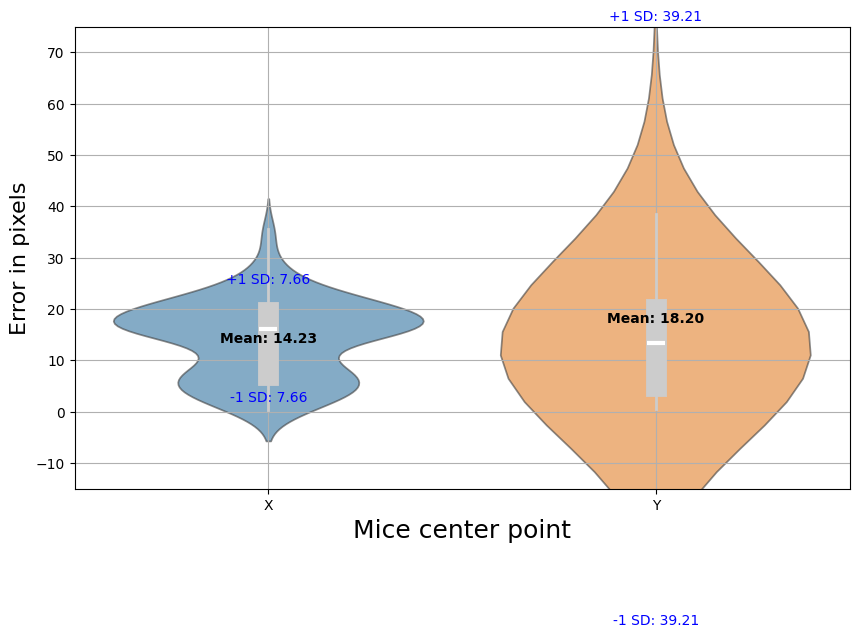

In [30]:
df_min = pd.DataFrame()
df_min.loc[:, 'min_x_1'] = min_df.loc[:, 'min_x_1']
df_min.loc[:, 'min_y_1'] = min_df.loc[:, 'min_y_1']
df_min.head()
# Configurar el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_min, alpha=0.6, inner_kws=dict(box_width=15, whis_width=2, color=".8"))  # Crear el diagrama de violín sin la línea interior

# Calcular y etiquetar el valor medio y la desviación estándar para cada columna
for i, col in enumerate(df_min.columns):
    mean = df_min[col].mean()
    std = df_min[col].std()
    
    # Agregar la etiqueta del valor medio
    plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    
    # Agregar la etiqueta de la desviación estándar
    plt.text(i, mean + 1.5*std, f'+1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)
    plt.text(i, mean - 1.5*std, f'-1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Configurar etiquetas y título
#plt.title('Error de detección entre el centro de la elipse (test) y el punto spine2 (train)')
#plt.xlabel('Posición de los puntos x, y por ratones')
#plt.ylabel('Error en píxeles')
#plt.title('Error between ellipse center (test) and spine2 point (train)')
plt.xticks(np.arange(2),['X','Y'])
plt.xlabel('Mice center point', fontsize=18)
plt.ylabel('Error in pixels',fontsize=16)
plt.ylim(-15,75)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [31]:
df_min.head()

,min_x_1,min_y_1
0,6.5000,23.00
1,4.2500,10.75
2,27.5000,10.00
3,19.3750,25.50
4,7.5625,2.00


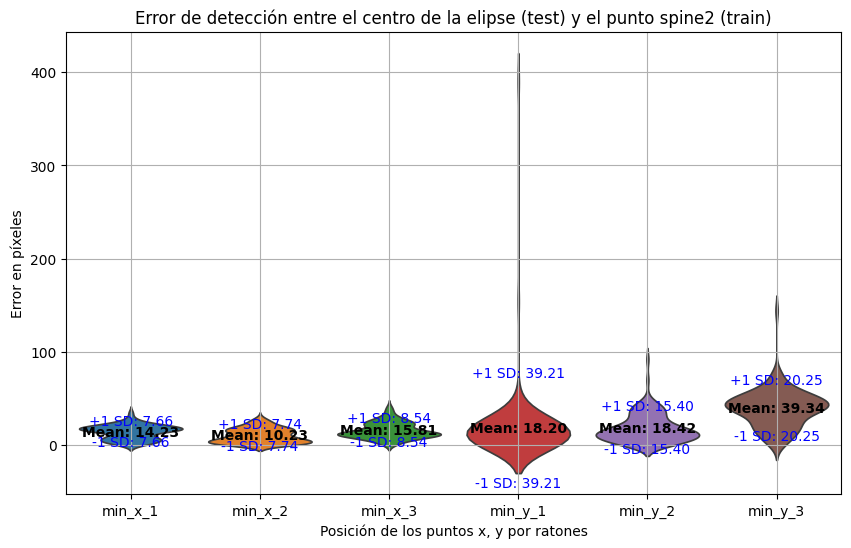

In [32]:
df_min = min_df
# Configurar el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_min, inner=None)  # Crear el diagrama de violín sin la línea interior

# Calcular y etiquetar el valor medio y la desviación estándar para cada columna
for i, col in enumerate(df_min.columns):
    mean = df_min[col].mean()
    std = df_min[col].std()
    
    # Agregar la etiqueta del valor medio
    plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    
    # Agregar la etiqueta de la desviación estándar
    plt.text(i, mean + 1.5*std, f'+1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)
    plt.text(i, mean - 1.5*std, f'-1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Configurar etiquetas y título
plt.title('Error de detección entre el centro de la elipse (test) y el punto spine2 (train)')
plt.xlabel('Posición de los puntos x, y por ratones')
plt.grid(True)
plt.ylabel('Error en píxeles')

# Mostrar el gráfico
plt.show()

In [33]:
file_name = r'C:\Users\inges\OneDrive - UDIT\src\photoneu\no_labels_test_times.csv'
df = pd.DataFrame() 
df = pd.read_csv(file_name)

df.drop(df.columns[0], axis=1, inplace=True)
df = df*1000
df.head()

,t_init_resize,t_gray_norm,t_blur,t_thres,t_erosion,t_opening,t_blobs
0,26.019339,0.470532,1.692887,0.066333,0.345736,0.591215,8.332068
1,14.279904,0.330255,2.362139,0.093740,0.496272,0.627807,1.999180
2,167.145404,0.368626,1.733664,0.056777,0.287682,0.590864,2.219825
3,97.301956,0.330347,1.674444,0.045740,0.276756,0.638233,2.041679
4,208.272416,0.322403,1.715110,0.053166,0.289904,0.606529,2.074624


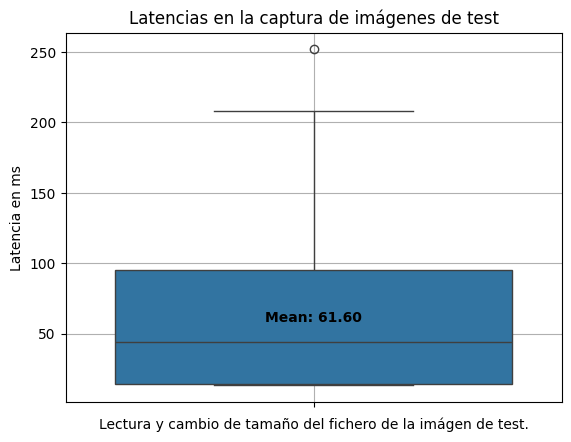

In [34]:
#df_min = df.drop(df.columns[0], axis = 1)
df_min = df
plt.figure()
sns.boxplot(data=df_min[df_min.columns[0]])  # Crear el diagrama de violín sin la línea interior

#for i, col in enumerate(df_min.columns):
mean = df_min[df_min.columns[0]].mean()
std = df_min[df_min.columns[0]].std()
plt.text(0, mean - 0.2, f'Mean: {mean:.2f}', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    
#    plt.text(i, mean + 1.5*std, f'+1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)
#    plt.text(i, mean - 1.5*std, f'-1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Configurar etiquetas y título
#plt.ylim(0,5)
plt.title('Latencias en la captura de imágenes de test')
plt.xlabel('Lectura y cambio de tamaño del fichero de la imágen de test.')
plt.grid(True)
plt.ylabel('Latencia en ms')

# Mostrar el gráfico
plt.show()

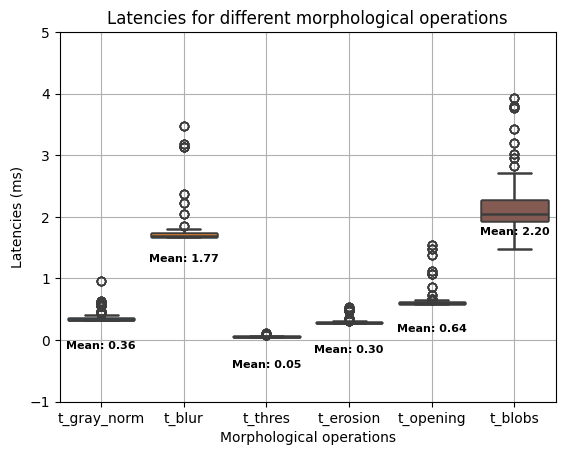

In [47]:
df_min = df.drop(df.columns[0], axis = 1)
#df_min = df
plt.figure()

for i, col in enumerate(df_min.columns):
    mean = df_min[df_min.columns[i]].mean()
    std = df_min[df_min.columns[i]].std()
    sns.boxplot(data=df_min)  # Crear el diagrama de violín sin la línea interior
    plt.text(i, mean - 0.45, f'Mean: {mean:.2f}', ha='center', va='center', color='black', fontsize=8, fontweight='bold')    
#    plt.text(i, mean + 1.5*std, f'+1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)
#    plt.text(i, mean - 1.5*std, f'-1 SD: {std:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Configurar etiquetas y título
plt.ylim(-1,5)
plt.title('Latencies for different morphological operations') 
plt.xlabel('Morphological operations')
#plt.title('Latencias en la captura de imágenes de test')
#plt.xlabel('Lectura y cambio de tamaño del fichero de la imágen de test.')
plt.grid(True)
plt.ylabel('Latencies (ms)')
#plt.ylabel('Latencia en ms')

# Mostrar el gráfico
plt.show()

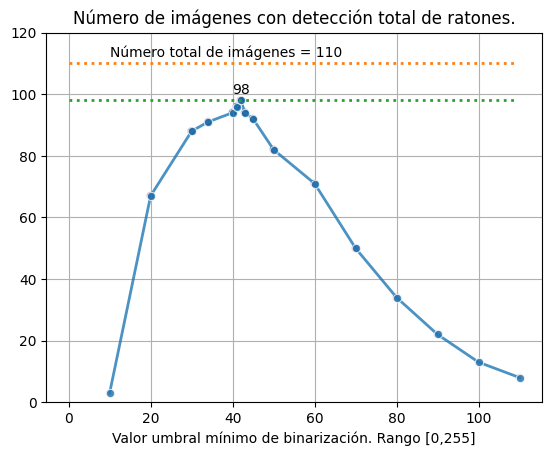

In [35]:
x = [10,20,30,34,40,41,42,43,45,50,60,70,80,90,100,110]
y = [3,67,88,91,94,96,98,94,92,82,71,50,34,22,13,8]
l = 110*np.ones(110)
plt.figure()
sns.scatterplot(x=x, y=y, hue=y, legend=False)
sns.lineplot(x=x, y=y, alpha=0.8, marker='o', linewidth=2)
plt.text(x=10,y=112,s="Número total de imágenes = 110")
plt.plot(l, linestyle = 'dotted', linewidth=2)
l = 98*np.ones(110)
plt.text(x=40,y=100,s="98")
plt.plot(l, linestyle = 'dotted', linewidth=2)
plt.ylim(0,120)

#plt.ylabel('Número de imágenes con detección de 3 ratones')
plt.xlabel(xlabel='Valor umbral mínimo de binarización. Rango [0,255]')
plt.grid(True)
plt.title("Número de imágenes con detección total de ratones.")
plt.show()


In [36]:

m = df['num_mice'].median()
s = df['num_mice'].std()
x = np.random.normal(-0.04,0.04,size=len(df['num_mice']))

print(s)
plt.figure()
sns.boxplot(df['num_mice'],fill=True,)
sns.violinplot(df['num_mice'],fill=True,)
plt.text(x = -0.1, y = 2.8, s="median = " + str(m))
plt.text(x = 0.05, y = 2.2, s=f"std = {s:.2f}" )
plt.plot(x, df['num_mice'], 'r.', alpha=0.4)
plt.title('Mediana de número de ratones detectados por imagen.')
plt.ylabel('Número de ratones')

plt.grid(False)
plt.show()


KeyError: 'num_mice'

In [ ]:
sum(df['num_mice'])

In [ ]:
n = df['num_mice'].astype('category')
plt.figure()
values = n.value_counts()
values.plot(kind='bar', alpha=0.8, color = 'cadetblue')
#plt.title('Mediana de número de ratones detectados por imagen.')
percent = n.value_counts() * 100 / len(n)
for i, v in enumerate(percent):
    plt.text( i, v + 6, s=f'{v:.2f}%'+'\n('+f'{values[3-i]:.0f}' +')', ha='center', va='center', color='maroon', fontsize=10)
l = 110*np.ones(110)
plt.plot(l, linestyle = 'dotted', linewidth=2, color='darkblue')
plt.text(-0.2, 110, "113", ha='center', va='center', color='darkblue', fontsize=10)

plt.ylim(0,114)
plt.xticks(rotation=0)
plt.xlabel('Number of mice')
plt.ylabel('Number of images')

plt.grid(True)
plt.show()


In [ ]:
print(n.value_counts())
print(len(n))
print(n.value_counts() * 100 / len(n))